In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [13]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [14]:
#df = df.iloc[:, 2:]

In [15]:
df.sample(5)

,Age,EstimatedSalary,Purchased
101,28,59000,0
73,33,113000,0
317,35,55000,0
384,57,33000,1
52,29,83000,0


In [16]:
df.shape

(400, 3)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [20]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# **Train Test Split**

It is mostly recommended that one should perform train test split before feature scaling, weather it is standardization or Normalization. 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size = 0.3, random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# **Standard Scaler**

scikit learn has a class, Standard Scaler - this does the same thing as we learnt from the function i.e,. subtracting the mean and dividing by the standard deviation.

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
# means, we let the class learn/fit on X_train values. here it will calculate the mean and standard deviation
scaler.fit(X_train)

# then that scaler function will transform the X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

tranform hone ke baad jo X_train scaled milega, that would be a numpy array and not data frame. so we will have to exclusively convert it again to a data frame.

In [26]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

**now we will compare data, before scaling and after scaling**

In [27]:
# the below code means to round the values upto 1 decimal places
np.round(X_train.describe() ,1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [28]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# **Effects of Scaling**

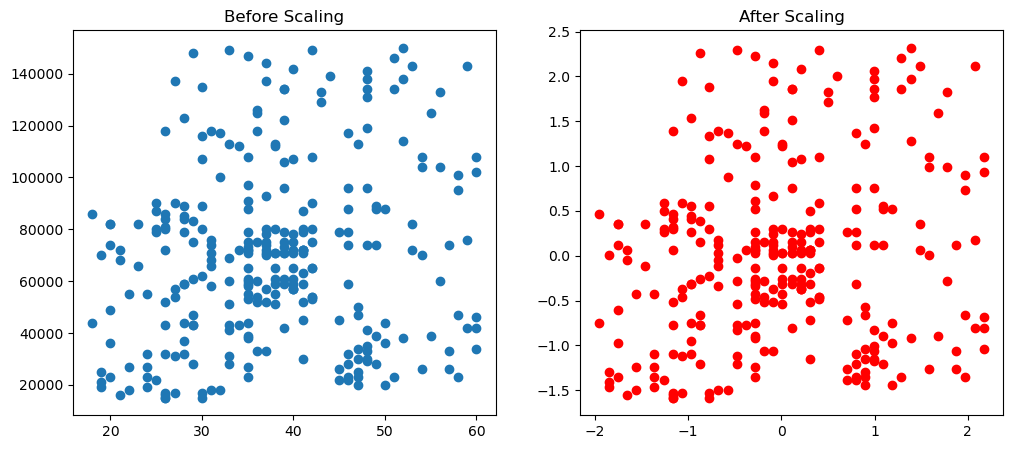

In [29]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'] , X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title("After Scaling")
plt.show()

As we can see, that even after and before scaling, the points are at the same position (almost) that means scaling does not affect the shape of the data. it just changes the range of the data. As we can infer from the graph, 'before' has mean around 40 whereas 'after' has mean 0.

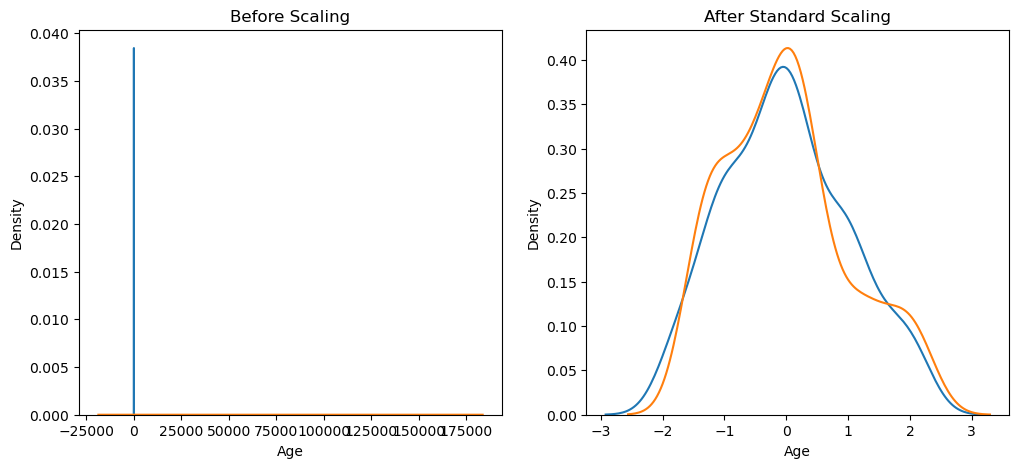

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols =2, figsize = (12,5))

#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'] , ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# after scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['Age'] , ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax= ax2)
plt.show()

# **Comparision of distributions**

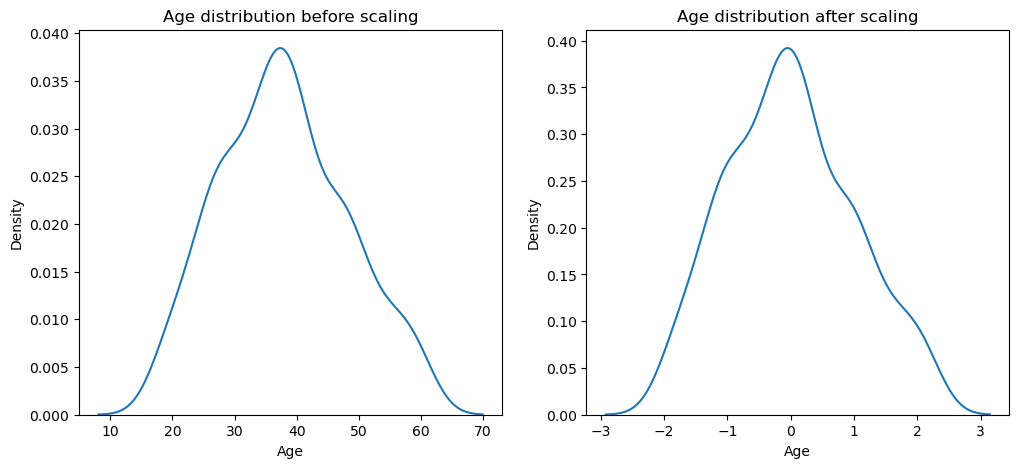

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Age distribution before scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age distribution after scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
plt.show()

This graphs shows that after standardization, there is no change in the distribution of data. It is exaclty the same.

# **Why is scaling important?**

In [32]:
from sklearn.linear_model import LogisticRegression


In [33]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [35]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


* Here is it note worthy that with the help of scaling, we have improved our accuracy to a very good level

In [40]:
# whereas there are certain algorithms who do not really show much of an impact after standardizzation
from sklearn.tree import DecisionTreeClassifier




In [41]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [42]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [43]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [44]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.8666666666666667


Here see that the accuracy score is same for both scaled as well as un-scaled data. therefore standardization does not have huge impacts on decision tree algo.

In [45]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# **Effect of outliers**

In [46]:
df = df.append(pd.DataFrame({'Age':[5,90,95], 'EstimatedSalary': [1000,250000,350000], 'Purchased':[0,1,1]}))

/tmp/ipykernel_32/3731821013.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95], 'EstimatedSalary': [1000,250000,350000], 'Purchased':[0,1,1]}))


In [47]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
0,5,1000,0
1,90,250000,1


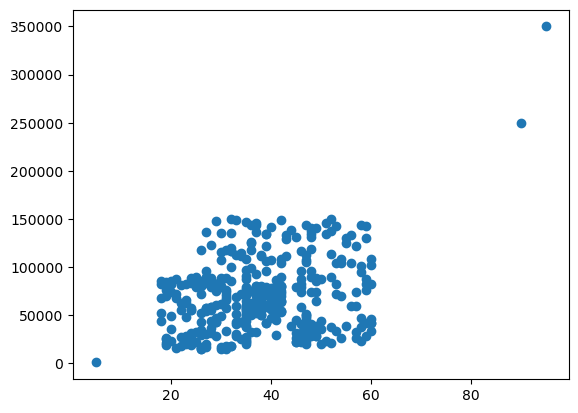

In [49]:
plt.scatter(df['Age'], df['EstimatedSalary'])

now after adding outliers in our data, if we scale the values again.. we will still get outliers. Hence it is very important to deal with outliers explicitly so that our model can perform better.

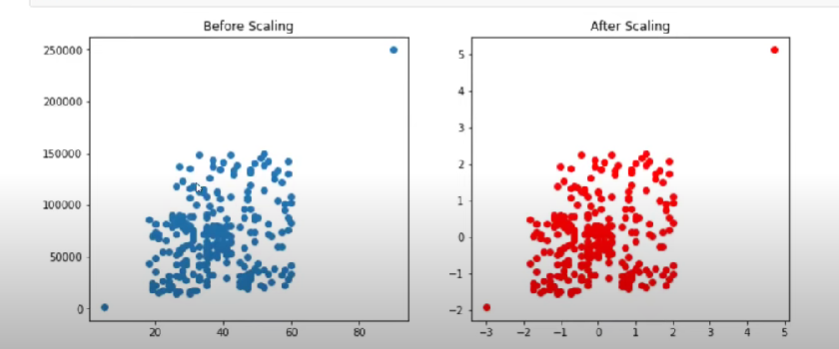